In [1]:
# Step 1: Dataset
# First, you need to obtain a dataset of movie reviews with labeled sentiments. 
# Let's assume you're using the IMDB Movie Reviews dataset, which is available in the nltk library in Python. 

In [2]:
# nltk.download('movie_reviews')
# nltk.download('punkt')
# nltk.download('stopwords')
# These are datasets that you need to download for this project

In [3]:
import nltk

In [4]:
# Step 2: Data Preprocessing
# Now, let's preprocess the data by removing HTML tags, punctuation, special characters, 
# converting text to lowercase, and removing stopwords.

In [5]:
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import string

# Preprocessing function
def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()
    
    # Remove punctuation and special characters
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Return preprocessed text as a string
    return ' '.join(filtered_tokens)

# Example usage
preprocessed_text = preprocess_text("This is an example review! It contains stopwords and special characters.")
print(preprocessed_text)


example review contains stopwords special characters


In [6]:
# Step 3: Exploratory Data Analysis
# Let's calculate basic statistics, analyze the distribution of review lengths, 
# and explore the most common words or phrases in positive and negative reviews.

Number of reviews: 2000
Number of positive reviews: 1000
Number of negative reviews: 1000


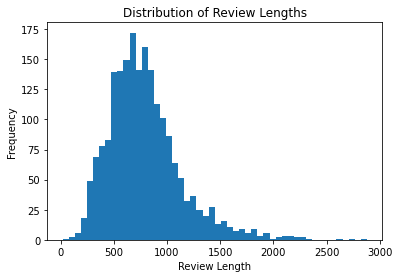

Most common positive words: [(',', 42448), ('the', 41471), ('.', 33714), ('a', 20196), ('and', 19896), ('of', 18636), ('to', 16517), ("'", 15268), ('is', 14059), ('in', 11725), ('s', 9659), ('"', 8492), ('it', 8351), ('that', 8121), ('-', 7931), ('as', 6478), (')', 6039), ('(', 6014), ('with', 5851), ('his', 5588), ('for', 5260), ('film', 5230), ('he', 4936), ('this', 4648), ('but', 4492), ('i', 4102), ('on', 3727), ('are', 3713), ('by', 3466), ('who', 3057), ('an', 3052), ('one', 3052), ('be', 3029), ('not', 2926), ('t', 2855), ('from', 2731), ('you', 2594), ('has', 2564), ('movie', 2525), ('at', 2495), ('was', 2477), ('her', 2456), ('they', 2332), ('have', 2240), ('all', 2183), ('more', 1841), ('like', 1802), ('out', 1802), ('which', 1743), ('there', 1726)]
Most common negative words: [(',', 35269), ('the', 35058), ('.', 32162), ('a', 17910), ('and', 15680), ('of', 15487), ('to', 15420), ("'", 15317), ('is', 11136), ('in', 10097), ('"', 9120), ('s', 8854), ('that', 7803), ('it', 7756

In [7]:
import matplotlib.pyplot as plt

# Calculate basic statistics
num_reviews = len(movie_reviews.fileids())
num_positive_reviews = len(movie_reviews.fileids(categories='pos'))
num_negative_reviews = len(movie_reviews.fileids(categories='neg'))

print("Number of reviews:", num_reviews)
print("Number of positive reviews:", num_positive_reviews)
print("Number of negative reviews:", num_negative_reviews)

# Analyze review lengths
review_lengths = [len(movie_reviews.words(fileid)) for fileid in movie_reviews.fileids()]
plt.hist(review_lengths, bins=50)
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.title("Distribution of Review Lengths")
plt.show()

# Explore most common words in positive reviews
positive_words = movie_reviews.words(categories='pos')
positive_freq_dist = nltk.FreqDist(positive_words)
print("Most common positive words:", positive_freq_dist.most_common(50))

# Explore most common words in negative reviews
negative_words = movie_reviews.words(categories='neg')
negative_freq_dist = nltk.FreqDist(negative_words)
print("Most common negative words:", negative_freq_dist.most_common(50))


In [8]:
# Step 4: Sentiment Analysis
# Divide the dataset into training and testing sets. 
# Then, train a sentiment analysis model using a machine learning algorithm such as Naive Bayes.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Prepare data and labels
documents = [(list(movie_reviews.words(fileid)), category) for category in movie_reviews.categories() for fileid in movie_reviews.fileids(category)]
reviews = [preprocess_text(' '.join(document)) for document, _ in documents]
labels = [label for _, label in documents]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=42)

# Convert text to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8


In [10]:
# Step 5: Visualization
# Visualize the performance of the sentiment analysis model using a confusion matrix.

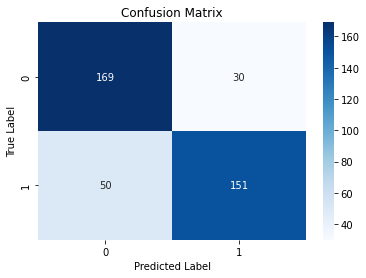

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
